# ECSE 415 - Intro. To Computer Vision
## Tutorial: Motion

## Optical Flow
Dense Optical Flow: Computing the optical flow for all points in the frame

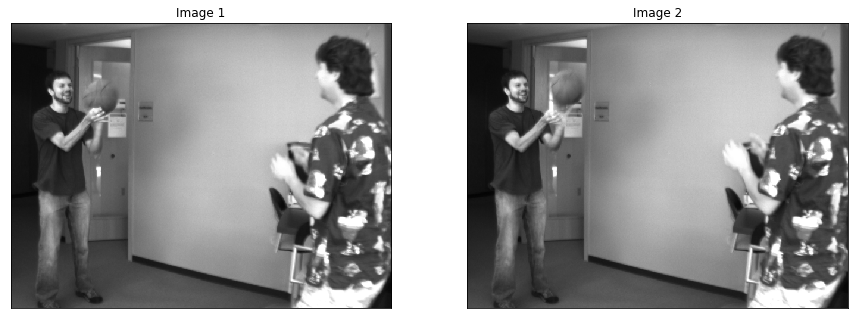

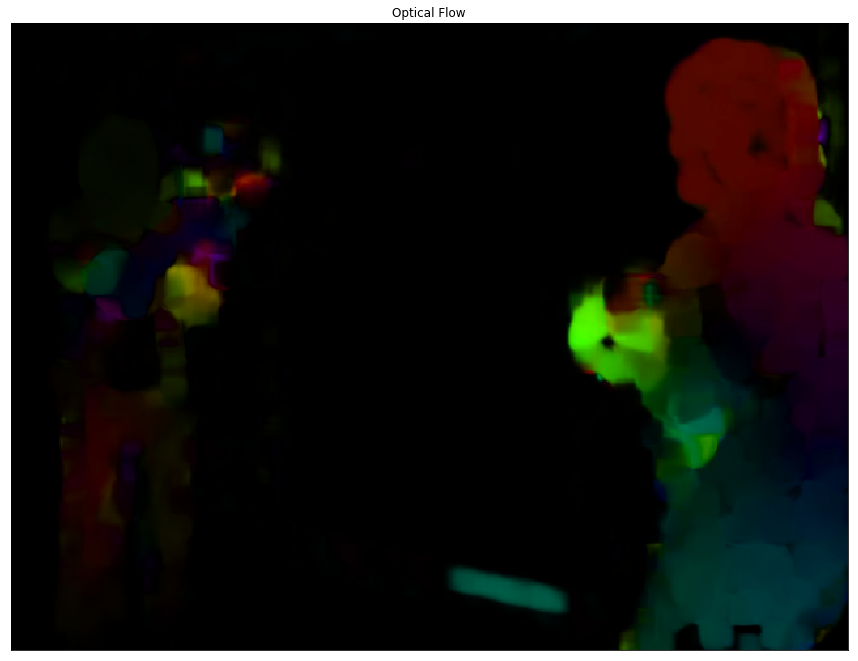

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read images
img1 = cv2.imread("basketball1.png")
img2 = cv2.imread("basketball2.png")

# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Compute optical flow using the Gunner Farneback's algorithm
#
# cv2.calcOpticalFlowFarneback(prev, next, flow, pyr_scale, levels, winsize, iterations, poly_n, poly_sigma, flags)
#
# 
#    prev – first 8-bit single-channel input image.
#    next – second input image of the same size and the same type as prev.
#    flow – computed flow image
#    pyr_scale – specifying the image scale (<1) to build pyramids for each image;
#                pyr_scale=0.5 means a classical pyramid.
#    levels – number of pyramid layers including the initial image; levels=1 means that no extra layers are.
#    winsize – averaging window size
#    iterations – number of iterations the algorithm does at each pyramid level.
#    poly_n – size of the pixel neighborhood used to find polynomial expansion in each pixel.
#    poly_sigma – standard deviation of the Gaussian that is used to smooth derivatives
#                 used as a basis for the polynomial expansion.
#    flags – operation flags that can be a combination of the following:
#        OPTFLOW_USE_INITIAL_FLOW uses the input flow as an initial flow approximation.
#        OPTFLOW_FARNEBACK_GAUSSIAN uses the Gaussian (winsize x winsize) filter instead of a box filter of the same size.

flow = cv2.calcOpticalFlowFarneback(img1_gray, img2_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# compute the mag/ang flow from the horizontal/vertial flow
mag, ang = cv2.cartToPolar(flow[:,:,0], -flow[:,:,1])

# To display the flow, we'll map different flow directions into different
# colors. The flow magnitude determines the color intensity. It is much
# easier to do this using the HSV color-space
# Hue: flow direcction
# Value: flow magnitude
# Saturation: constant
# initialize the hsv image
hsv = np.zeros_like(img1)
# set the saturation level
hsv[:, :, 1] = 255

# set the hue to the angular flow (in radians)
hsv[:, :, 0] = (ang * 180 / np.pi) / 2

# set the intensity to the normalized mag flow
hsv[:, :, 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

# convert to RGB for display
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.imshow(rgb)
plt.title("Optical Flow"), plt.xticks([]), plt.yticks([])
plt.show()

Lucas-Kanade Optical Flow: Tracking corner-like points

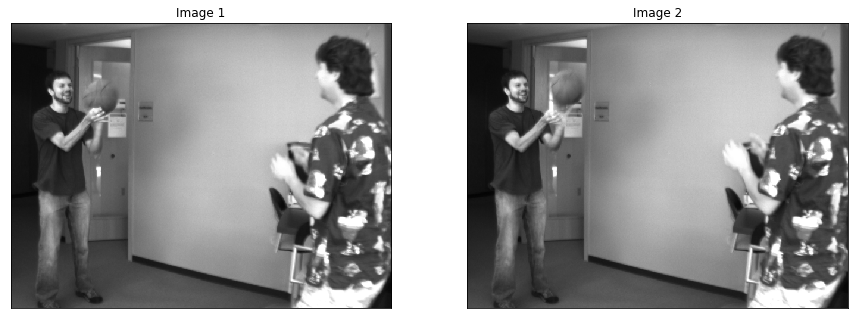

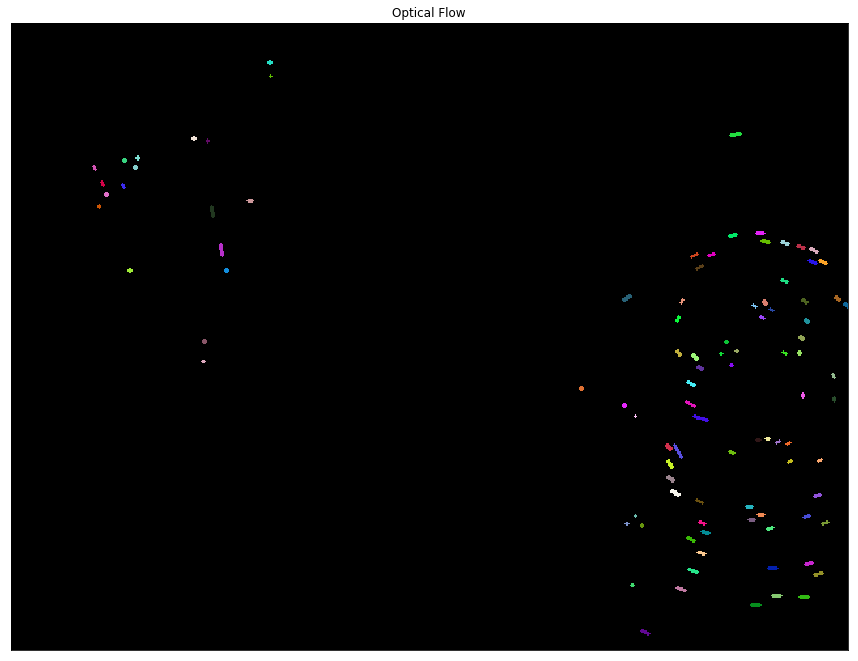

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read images
img1 = cv2.imread("basketball1.png")
img2 = cv2.imread("basketball2.png")

# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# parameters for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# parameters for lucas kanade optical flow
lk_params = dict( winSize = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                             10, 0.03))

# create some random colors
color = np.random.randint(0, 255, (100, 3))

# find good corners in the first image
p0 = cv2.goodFeaturesToTrack(img1_gray, **feature_params)

# calculate optical flow
# pass the previous image, previous points and the current image
# p1: current points
# st: status numbers which has a value of 1 if next point is found,
#   else zero
p1, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p0, None, **lk_params)

# select good points
good_new = p1[st==1]
good_old = p0[st==1]

# create a mask image for drawing purposes
mask = np.zeros_like(img1)

# draw the tracks
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    mask = cv2.line(mask, (a,b), (c,d), color[i].tolist(), 2)

# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.imshow(mask)
plt.title("Optical Flow"), plt.xticks([]), plt.yticks([])
plt.show()